Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

# 1. Generate dataset with pandas
start_pandas = time.time()
df_pandas = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['random_numbers'])
end_pandas = time.time()
pandas_duration = end_pandas - start_pandas

# 2. Generate dataset with NumPy
start_numpy = time.time()
data_numpy = np.random.randint(1, 101, size=(1000000, 1))
end_numpy = time.time()
numpy_duration = end_numpy - start_numpy

# Output the durations
print(f"Pandas duration: {pandas_duration} seconds")
print(f"NumPy duration: {numpy_duration} seconds")

# Comparison result
if pandas_duration < numpy_duration:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Pandas duration: 0.022102832794189453 seconds
NumPy duration: 0.017636537551879883 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [20]:
import pandas as pd
import numpy as np
import time

# Use pandas for calculations
start_time_pandas = time.time()

# Load the dataset
df = pd.read_csv('sleep_health.csv')

# Print the first few rows of the data to confirm the data structure
print(df.head())

# Select only the columns that contain numeric data
numeric_columns = ['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']
df_numeric = df[numeric_columns].select_dtypes(include=[np.number])  # Select only numeric columns

# Calculate means
mean_sleep_duration_pd = df_numeric['Sleep Duration'].mean()
mean_systolic_bp_pd = df_numeric['Systolic blood pressure'].mean()
mean_diastolic_bp_pd = df_numeric['Diastolic blood pressure'].mean()
mean_heart_rate_pd = df_numeric['Heart Rate'].mean()
mean_daily_steps_pd = df_numeric['Daily Steps'].mean()

# Calculate correlation
correlation_matrix_pd = df_numeric.corr()

# Calculate correlations separately
correlation_sleep_age_pd = correlation_matrix_pd['Sleep Duration'].get('Age', None)  # 'Age' may not be in numeric columns
correlation_sleep_heart_rate_pd = correlation_matrix_pd['Sleep Duration']['Heart Rate']
correlation_sleep_daily_steps_pd = correlation_matrix_pd['Sleep Duration']['Daily Steps']

# Calculate standard deviation
std_sleep_duration_pd = df_numeric['Sleep Duration'].std()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# Use NumPy for calculations
start_time_numpy = time.time()

# Extract the required numeric columns
# Convert the DataFrame to a NumPy array
data_np = df_numeric.to_numpy()

# Extract each column
sleep_duration_np = data_np[:, 0]  # 'Sleep Duration'
systolic_bp_np = data_np[:, 1]      # 'Systolic blood pressure'
diastolic_bp_np = data_np[:, 2]     # 'Diastolic blood pressure'
heart_rate_np = data_np[:, 3]       # 'Heart Rate'
daily_steps_np = data_np[:, 4]      # 'Daily Steps'

# Calculate means
mean_sleep_duration_np = np.mean(sleep_duration_np)
mean_systolic_bp_np = np.mean(systolic_bp_np)
mean_diastolic_bp_np = np.mean(diastolic_bp_np)
mean_heart_rate_np = np.mean(heart_rate_np)
mean_daily_steps_np = np.mean(daily_steps_np)

# Calculate correlation
correlation_matrix_np = np.corrcoef(data_np.T)

# Calculate correlations separately
correlation_sleep_heart_rate_np = correlation_matrix_np[0, 3]
correlation_sleep_daily_steps_np = correlation_matrix_np[0, 4]

# Calculate standard deviation
std_sleep_duration_np = np.std(sleep_duration_np)

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# Print results
print(f"pandas took {pandas_time:.6f} seconds")
print(f"NumPy took {numpy_time:.6f} seconds")

print("\nResults using pandas:")
print(f"Mean Sleep Duration: {mean_sleep_duration_pd:.2f}")
print(f"Mean Systolic BP: {mean_systolic_bp_pd:.2f}")
print(f"Mean Diastolic BP: {mean_diastolic_bp_pd:.2f}")
print(f"Mean Heart Rate: {mean_heart_rate_pd:.2f}")
print(f"Mean Daily Steps: {mean_daily_steps_pd:.2f}")

print(f"Correlation (Sleep Duration vs Heart Rate): {correlation_sleep_heart_rate_pd:.2f}")
print(f"Correlation (Sleep Duration vs Daily Steps): {correlation_sleep_daily_steps_pd:.2f}")

print(f"Standard Deviation of Sleep Duration: {std_sleep_duration_pd:.2f}")

print("\nResults using NumPy:")
print(f"Mean Sleep Duration: {mean_sleep_duration_np:.2f}")
print(f"Mean Systolic BP: {mean_systolic_bp_np:.2f}")
print(f"Mean Diastolic BP: {mean_diastolic_bp_np:.2f}")
print(f"Mean Heart Rate: {mean_heart_rate_np:.2f}")
print(f"Mean Daily Steps: {mean_daily_steps_np:.2f}")

print(f"Correlation (Sleep Duration vs Heart Rate): {correlation_sleep_heart_rate_np:.2f}")
print(f"Correlation (Sleep Duration vs Daily Steps): {correlation_sleep_daily_steps_np:.2f}")

print(f"Standard Deviation of Sleep Duration: {std_sleep_duration_np:.2f}")


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

   Systolic blood pressure  Diastolic blood pressure  Heart Rate  Daily Steps  \
0                      126                        83          77       

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

Data shape: (374, 14)
Column names: Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')


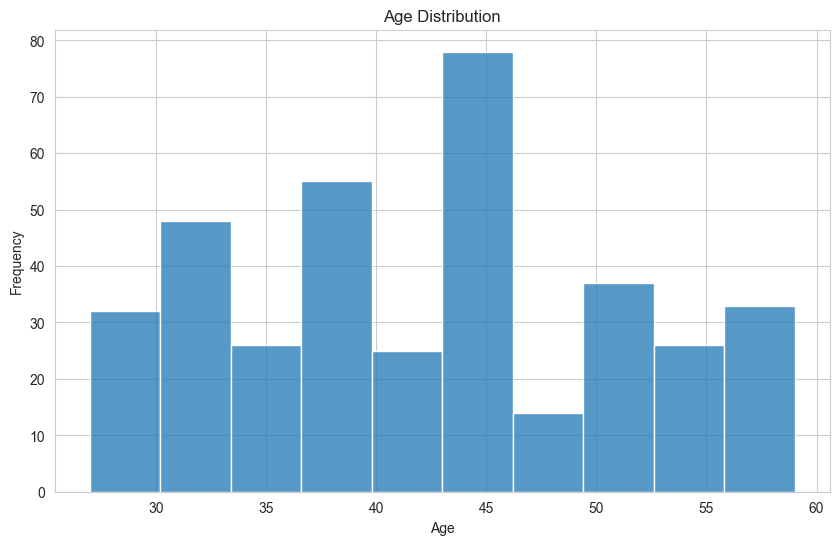

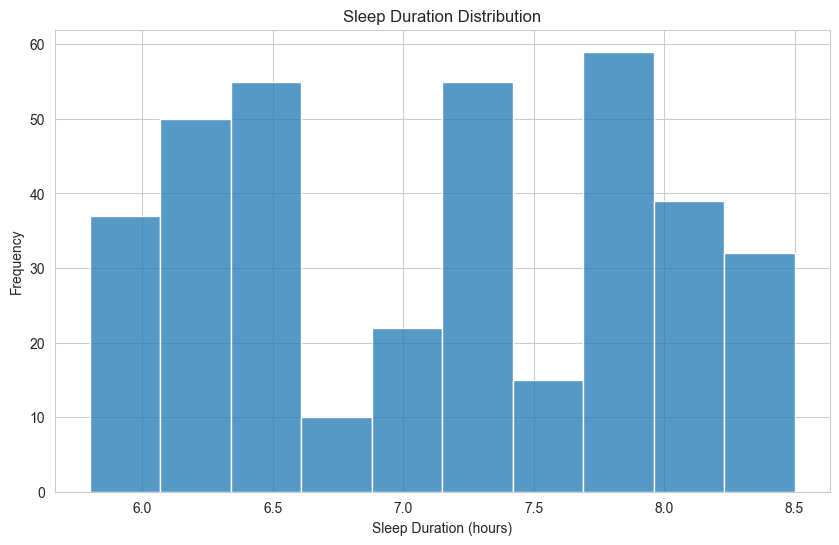

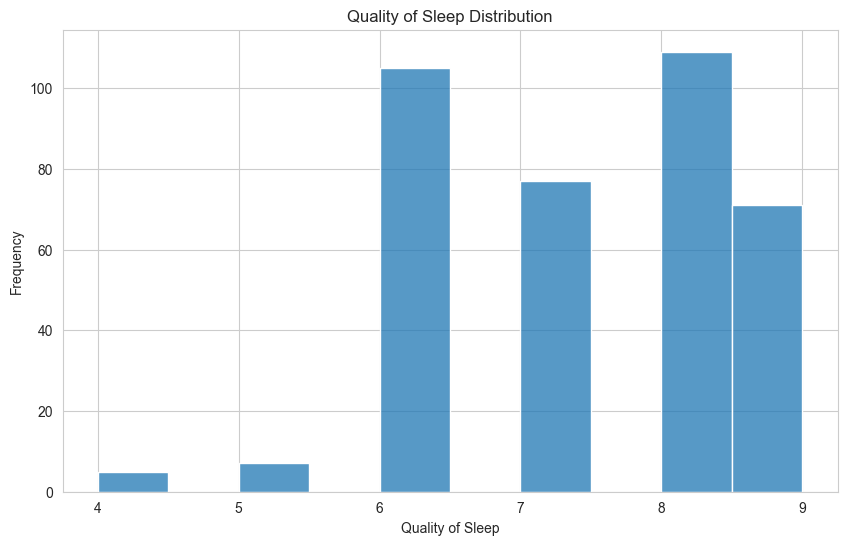

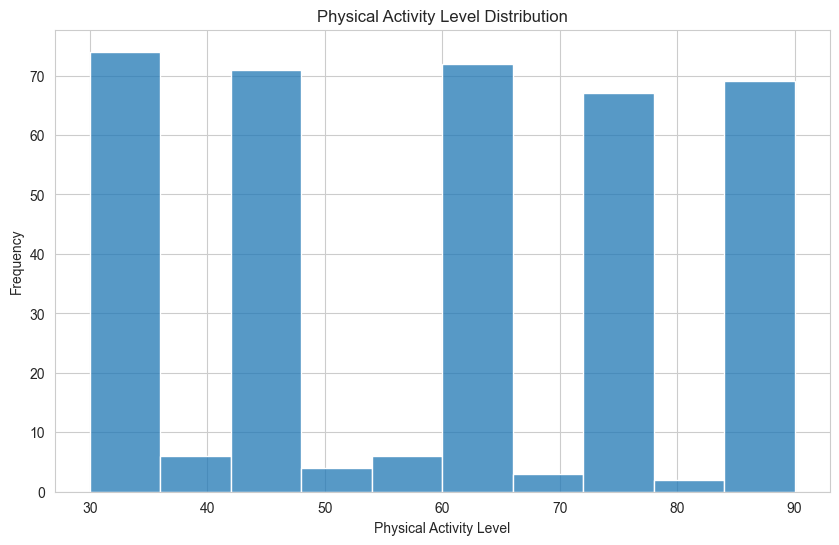

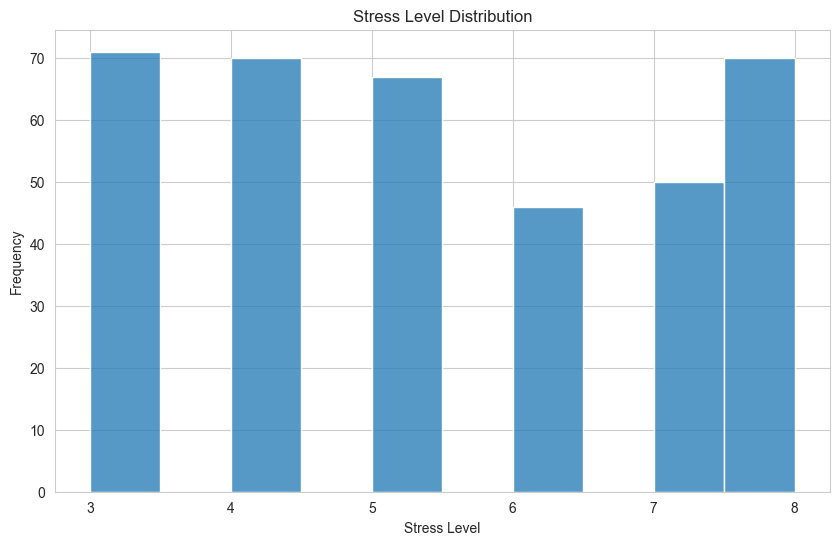

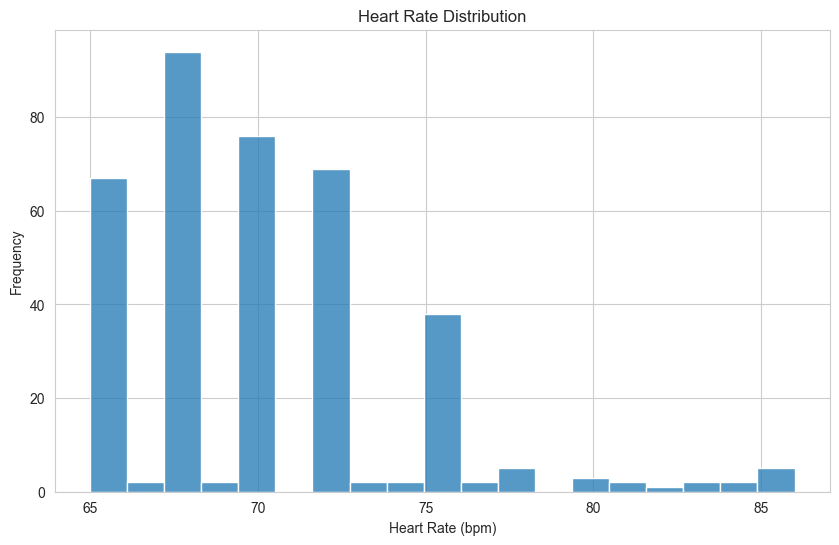

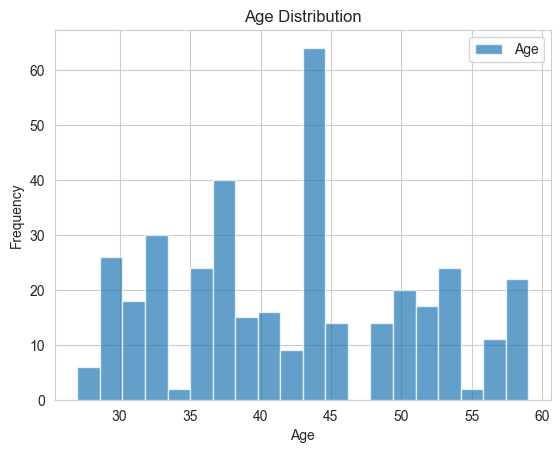

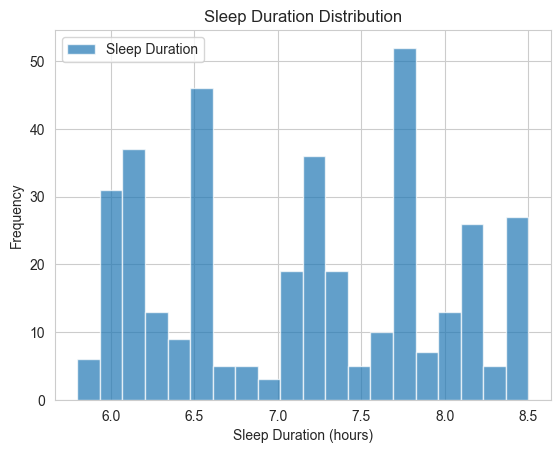

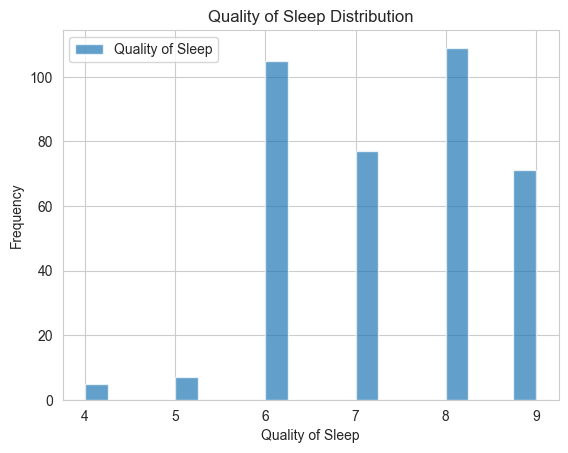

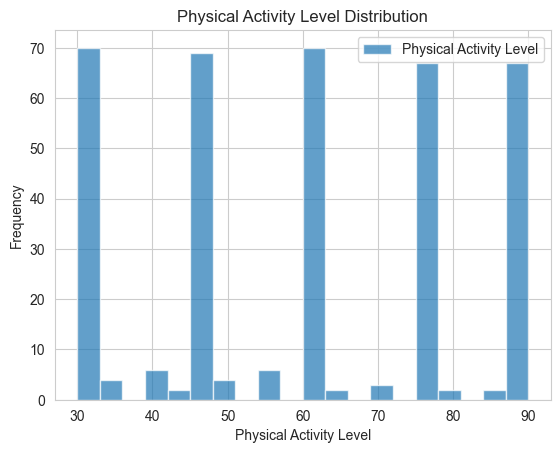

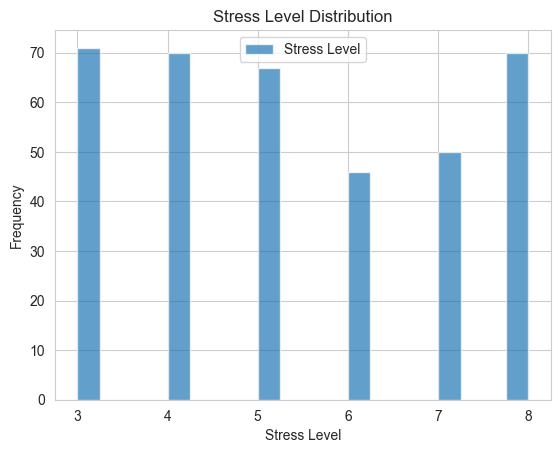

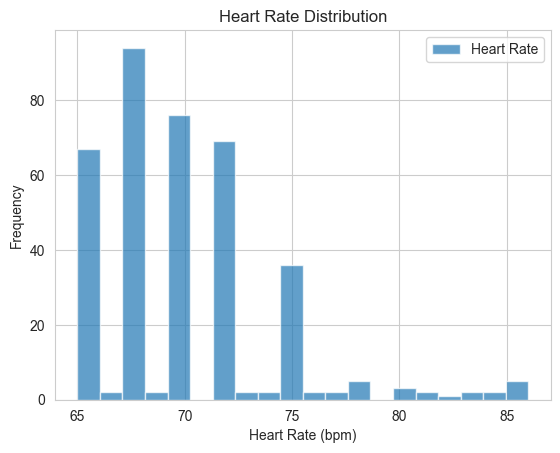

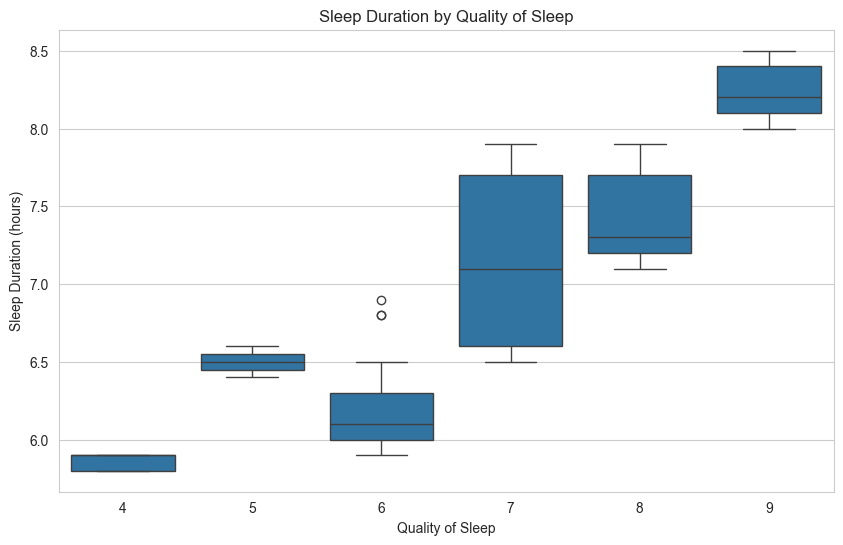

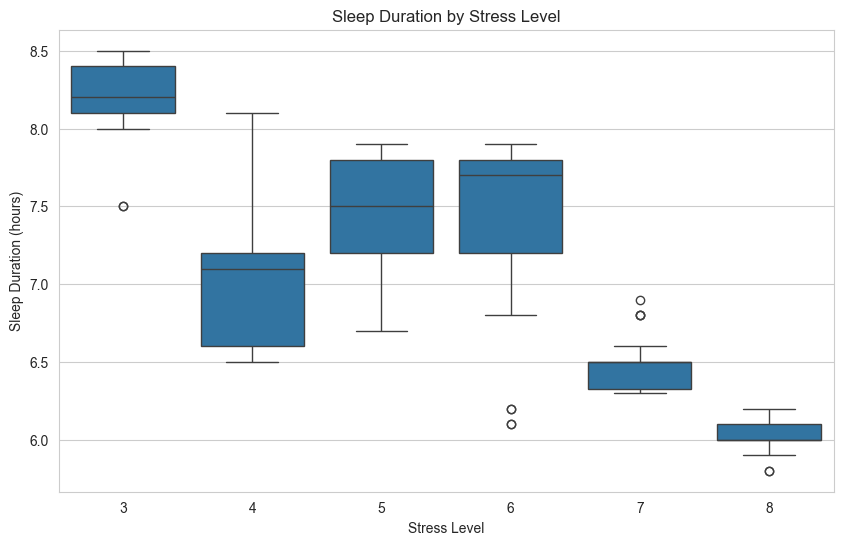

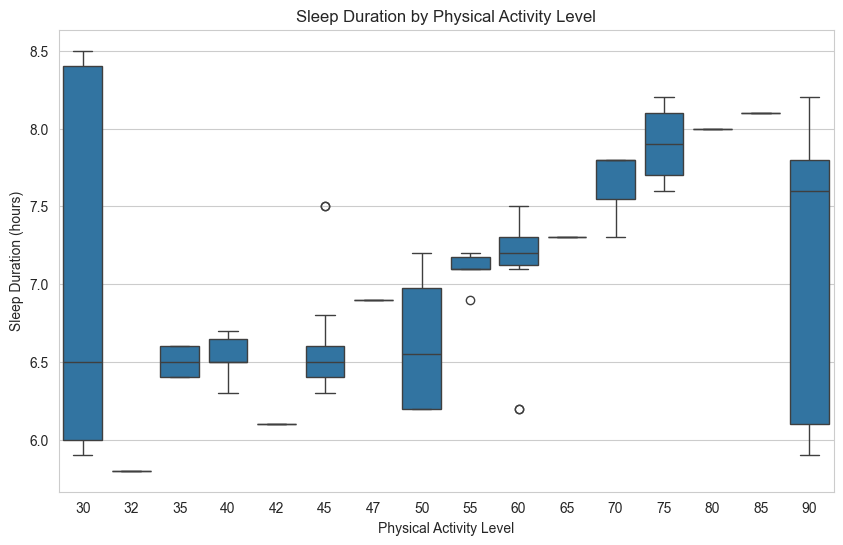

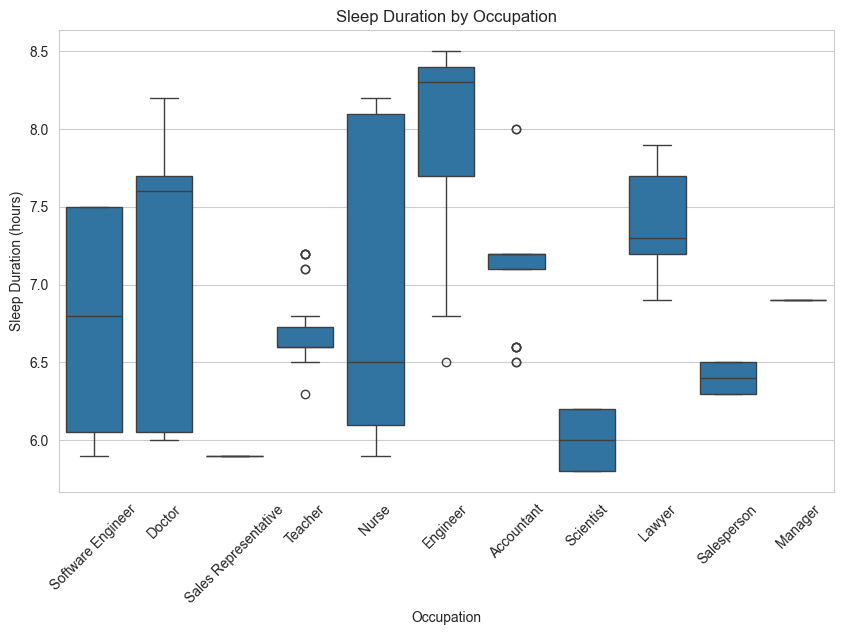

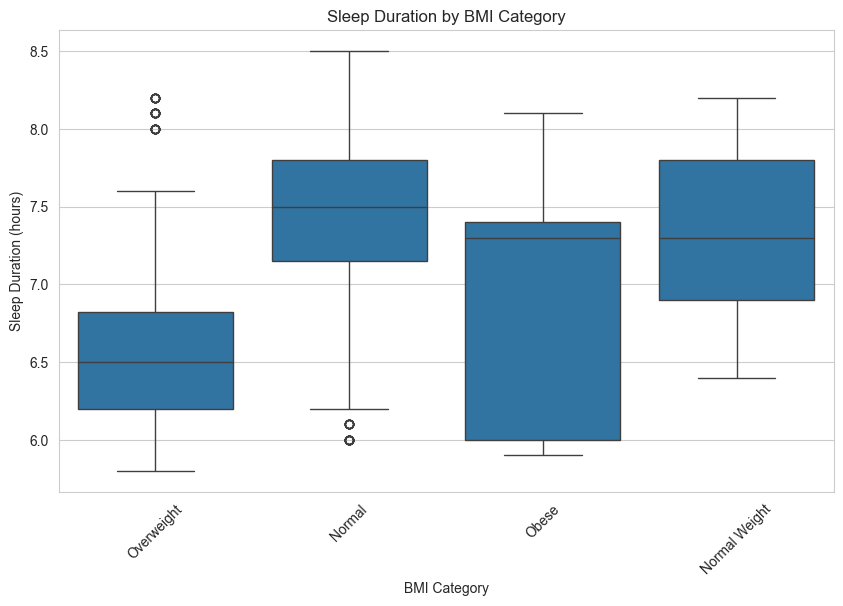

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10600\4077629538.py:171: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_durations_by_quality, labels=qualities)


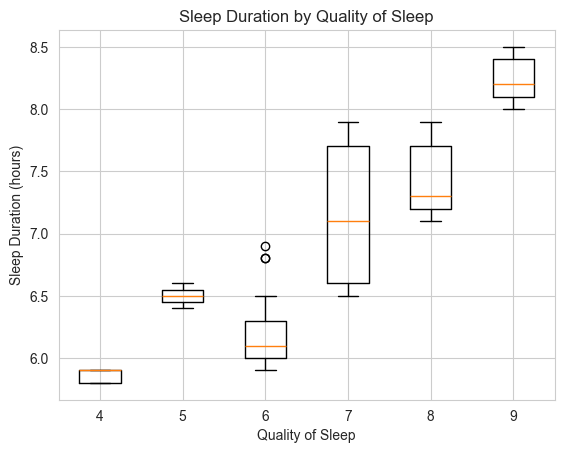

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10600\4077629538.py:180: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_durations_by_stress, labels=stresses)


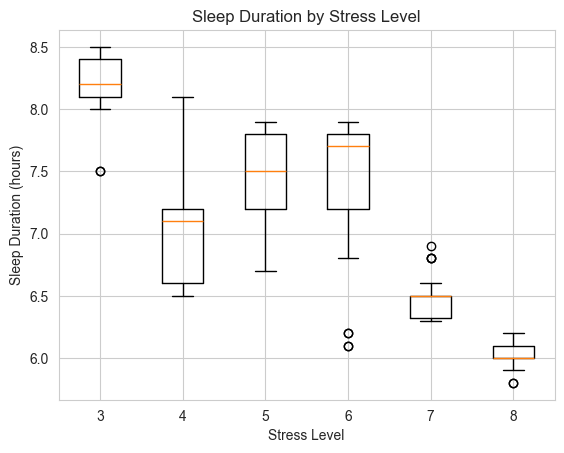

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10600\4077629538.py:189: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_durations_by_activity, labels=activity_levels)


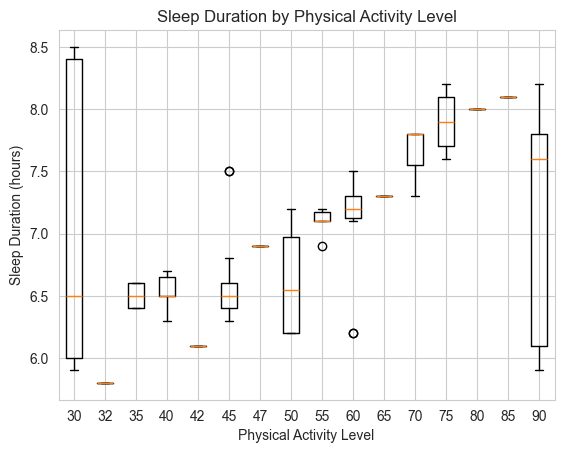

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10600\4077629538.py:198: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_durations_by_occupation, labels=occupations)


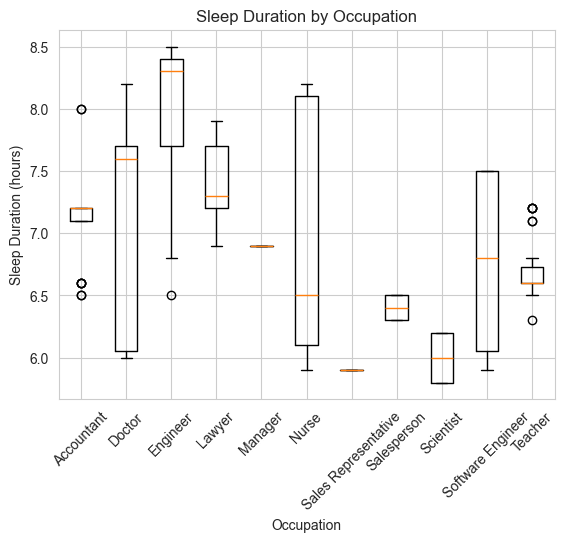

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10600\4077629538.py:208: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_durations_by_bmi, labels=bmis)


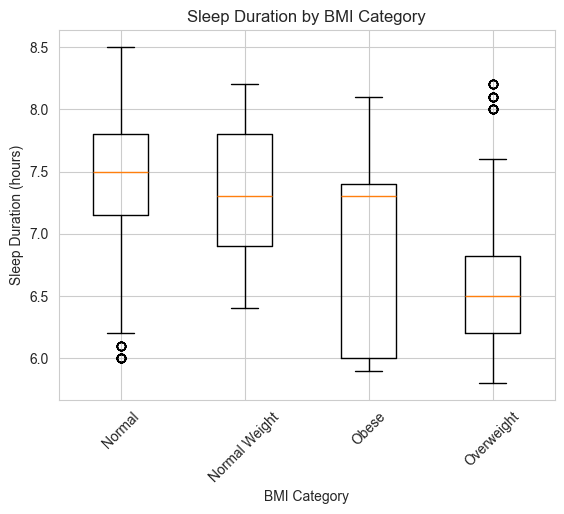

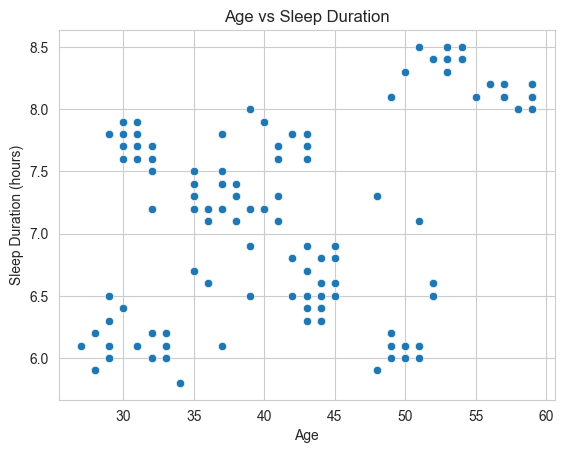

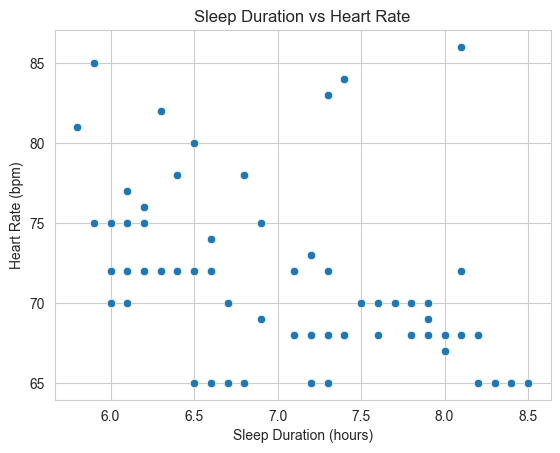

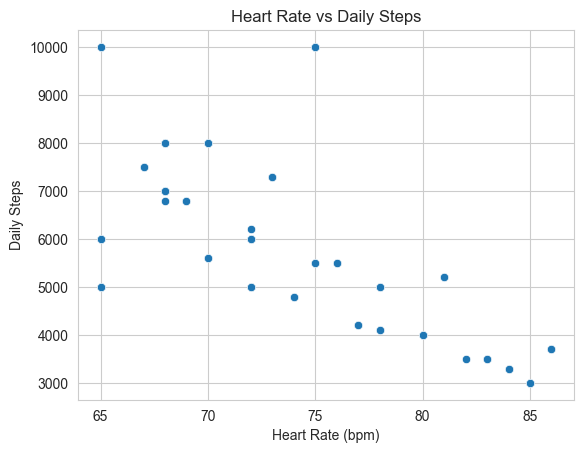

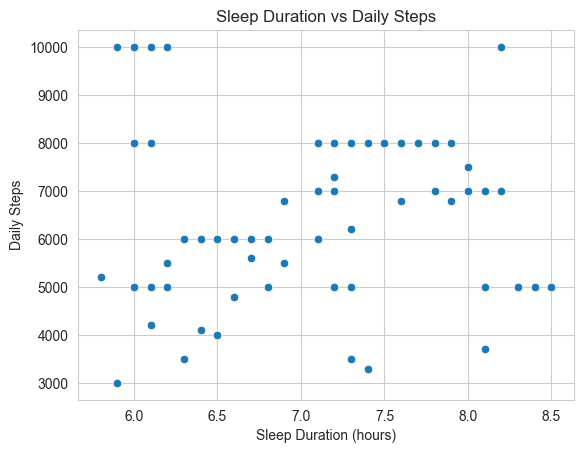

Number of columns: 14


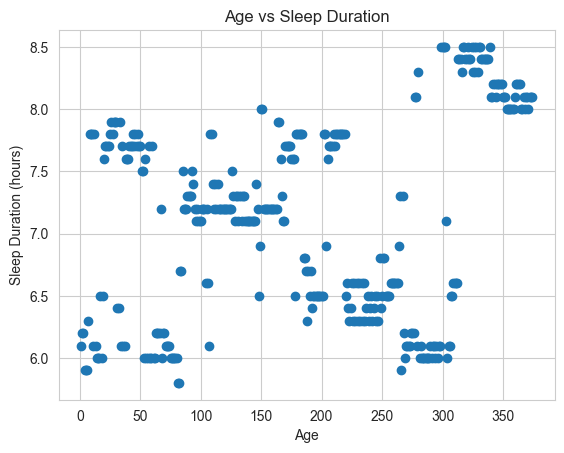

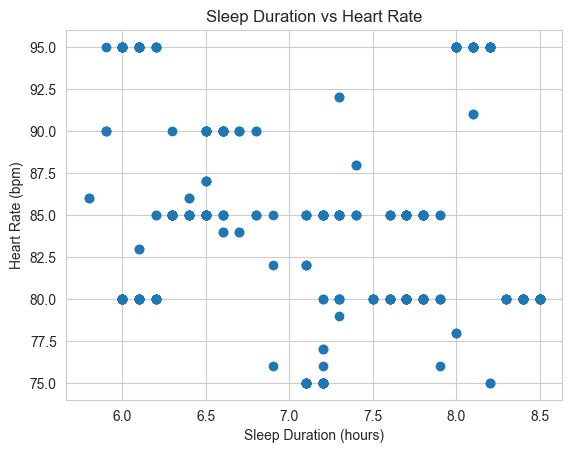

Insufficient columns for Heart Rate vs Daily Steps plot.
Insufficient columns for Sleep Duration vs Daily Steps plot.
Pandas execution time: 0.0010170936584472656 seconds
NumPy execution time: 0.0010004043579101562 seconds
Not enough data to compute correlation between Heart Rate and Daily Steps.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Load data
data = pd.read_csv('sleep_health.csv')

# Print the shape and columns of the data
data_np = data.values  # Convert DataFrame to NumPy array
print("Data shape:", data_np.shape)  # Check the number of rows and columns
print("Column names:", data.columns)   # Display the names of the columns

# Set plotting style
sns.set_style("whitegrid")

# 1.1. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 1.2. Sleep Duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep Duration'])
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 1.3. Quality of Sleep distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Quality of Sleep'])
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

# 1.4. Physical Activity Level distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Physical Activity Level'])
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

# 1.5. Stress Level distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Stress Level'])
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# 1.6. Heart Rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Heart Rate'])
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

# 2. Using NumPy to plot distributions

# 2.1. Age distribution
ages = data['Age'].values
plt.hist(ages, bins=20, alpha=0.7, label='Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2.2. Sleep Duration distribution
sleep_durations = data['Sleep Duration'].values
plt.hist(sleep_durations, bins=20, alpha=0.7, label='Sleep Duration')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2.3. Quality of Sleep distribution
quality_of_sleep = data['Quality of Sleep'].values
plt.hist(quality_of_sleep, bins=20, alpha=0.7, label='Quality of Sleep')
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2.4. Physical Activity Level distribution
physical_activity_level = data['Physical Activity Level'].values
plt.hist(physical_activity_level, bins=20, alpha=0.7, label='Physical Activity Level')
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2.5. Stress Level distribution
stress_level = data['Stress Level'].values
plt.hist(stress_level, bins=20, alpha=0.7, label='Stress Level')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2.6. Heart Rate distribution
heart_rate = data['Heart Rate'].values
plt.hist(heart_rate, bins=20, alpha=0.7, label='Heart Rate')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. Using pandas to plot categorical distributions

# 3.1. Sleep Duration by Quality of Sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x="Quality of Sleep", y="Sleep Duration", data=data)
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2. Sleep Duration by Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x="Stress Level", y="Sleep Duration", data=data)
plt.title('Sleep Duration by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3. Sleep Duration by Physical Activity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x="Physical Activity Level", y="Sleep Duration", data=data)
plt.title('Sleep Duration by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4. Sleep Duration by Occupation
plt.figure(figsize=(10, 6))
sns.boxplot(x="Occupation", y="Sleep Duration", data=data)
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 3.5. Sleep Duration by BMI Category
plt.figure(figsize=(10, 6))
sns.boxplot(x="BMI Category", y="Sleep Duration", data=data)
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 4. Using NumPy to plot categorical distributions

# 4.1. Sleep Duration by Quality of Sleep
qualities = np.unique(data['Quality of Sleep'])
sleep_durations_by_quality = [data['Sleep Duration'][data['Quality of Sleep'] == q] for q in qualities]
plt.boxplot(sleep_durations_by_quality, labels=qualities)
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.2. Sleep Duration by Stress Level
stresses = np.unique(data['Stress Level'])
sleep_durations_by_stress = [data['Sleep Duration'][data['Stress Level'] == s] for s in stresses]
plt.boxplot(sleep_durations_by_stress, labels=stresses)
plt.title('Sleep Duration by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.3. Sleep Duration by Physical Activity Level
activity_levels = np.unique(data['Physical Activity Level'])
sleep_durations_by_activity = [data['Sleep Duration'][data['Physical Activity Level'] == a] for a in activity_levels]
plt.boxplot(sleep_durations_by_activity, labels=activity_levels)
plt.title('Sleep Duration by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.4. Sleep Duration by Occupation
occupations = np.unique(data['Occupation'])
sleep_durations_by_occupation = [data['Sleep Duration'][data['Occupation'] == o] for o in occupations]
plt.boxplot(sleep_durations_by_occupation, labels=occupations)
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 4.5. Sleep Duration by BMI Category
bmis = np.unique(data['BMI Category'])
sleep_durations_by_bmi = [data['Sleep Duration'][data['BMI Category'] == b] for b in bmis]
plt.boxplot(sleep_durations_by_bmi, labels=bmis)
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 5. Using pandas to plot scatter plots

# 5.1. Age vs Sleep Duration
sns.scatterplot(x='Age', y='Sleep Duration', data=data)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.2. Sleep Duration vs Heart Rate
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=data)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# 5.3. Heart Rate vs Daily Steps
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=data)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 5.4. Sleep Duration vs Daily Steps
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=data)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()

# 6. Using NumPy to plot scatter plots

def numpy_scatterplot(x, y, title, xlabel, ylabel):
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Validate the shape before accessing indices
num_columns = data_np.shape[1]
print("Number of columns:", num_columns)

# 6.1. Age vs Sleep Duration
numpy_scatterplot(data_np[:, 0], data_np[:, 4], 'Age vs Sleep Duration', 'Age', 'Sleep Duration (hours)')

# 6.2. Sleep Duration vs Heart Rate
numpy_scatterplot(data_np[:, 4], data_np[:, 10], 'Sleep Duration vs Heart Rate', 'Sleep Duration (hours)', 'Heart Rate (bpm)')

# Check available indices before plotting
if num_columns > 14:
    # 6.3. Heart Rate vs Daily Steps
    numpy_scatterplot(data_np[:, 10], data_np[:, 14], 'Heart Rate vs Daily Steps', 'Heart Rate (bpm)', 'Daily Steps')
else:
    print("Insufficient columns for Heart Rate vs Daily Steps plot.")

# Check available indices before plotting
if num_columns > 14:
    # 6.4. Sleep Duration vs Daily Steps
    numpy_scatterplot(data_np[:, 4], data_np[:, 14], 'Sleep Duration vs Daily Steps', 'Sleep Duration (hours)', 'Daily Steps')
else:
    print("Insufficient columns for Sleep Duration vs Daily Steps plot.")

# Performance Measurement

# Measure performance of pandas
start_time_pd = time.time()
# Perform some operations with pandas
data['Sleep Duration'].mean()
data['Heart Rate'].corr(data['Daily Steps'])
end_time_pd = time.time()
print(f"Pandas execution time: {end_time_pd - start_time_pd} seconds")

# Measure performance of NumPy
start_time_np = time.time()
# Perform some operations with NumPy
mean_sleep_duration = np.mean(data_np[:, 4])
correlation = np.corrcoef(data_np[:, 10], data_np[:, 14])[0, 1] if num_columns > 14 else None
end_time_np = time.time()
print(f"NumPy execution time: {end_time_np - start_time_np} seconds")

if correlation is not None:
    print(f"Correlation between Heart Rate and Daily Steps: {correlation}")
else:
    print("Not enough data to compute correlation between Heart Rate and Daily Steps.")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



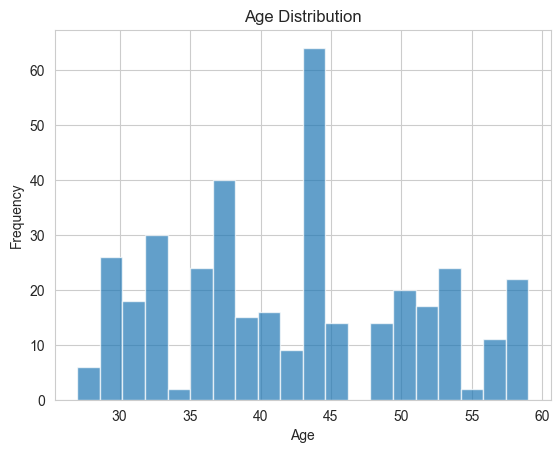

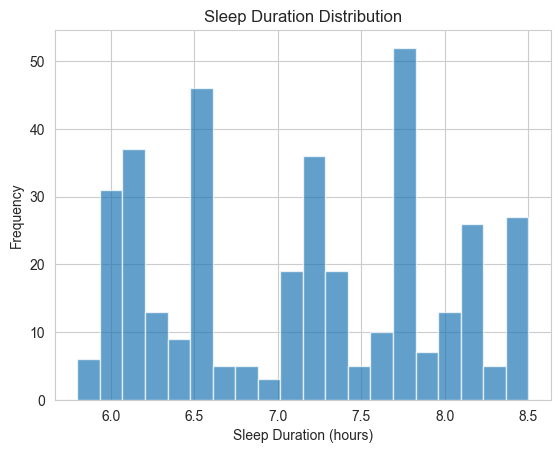

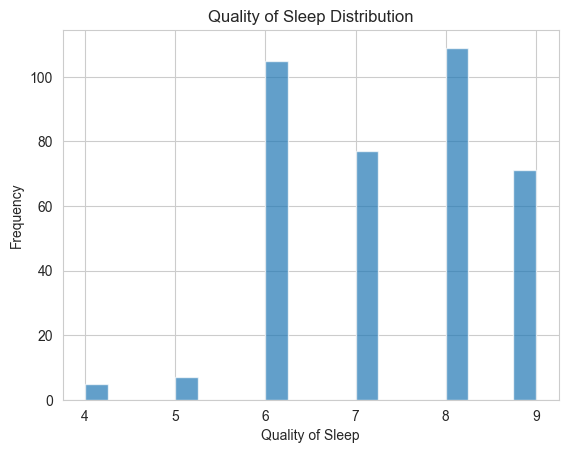

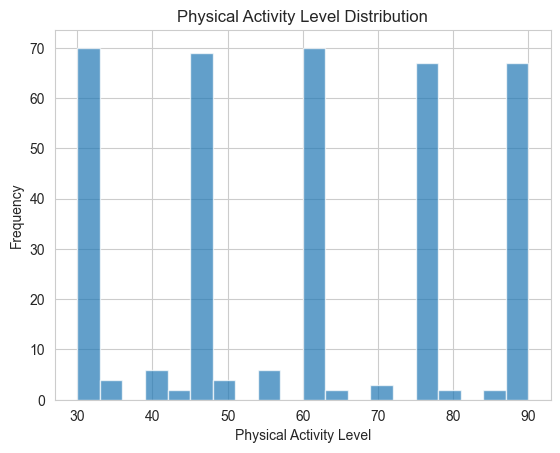

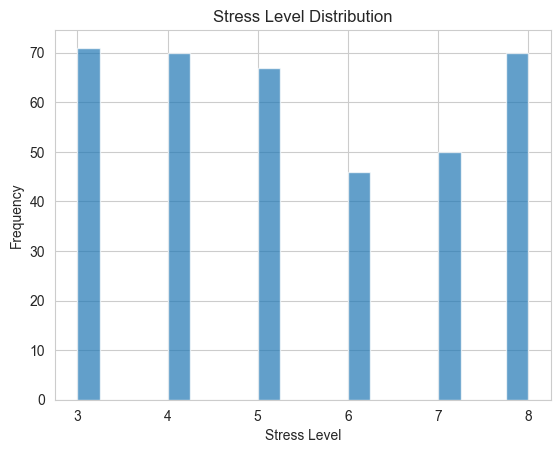

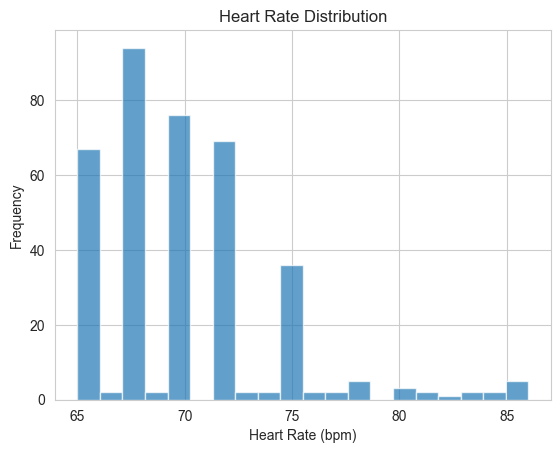

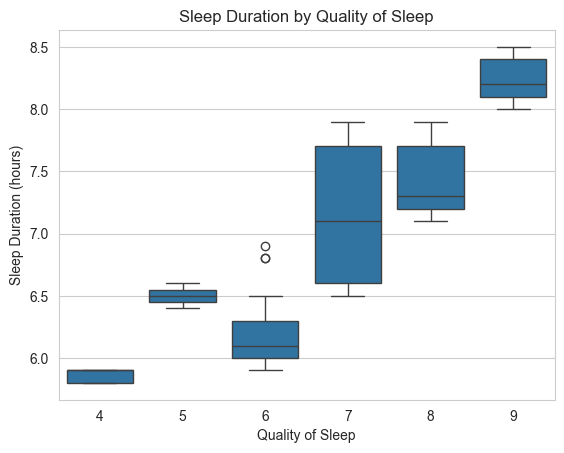

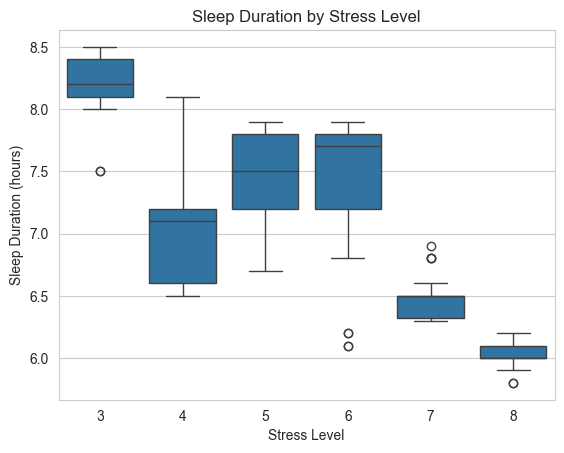

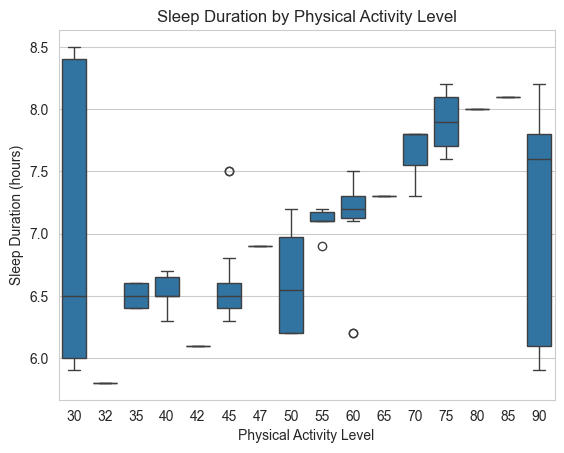

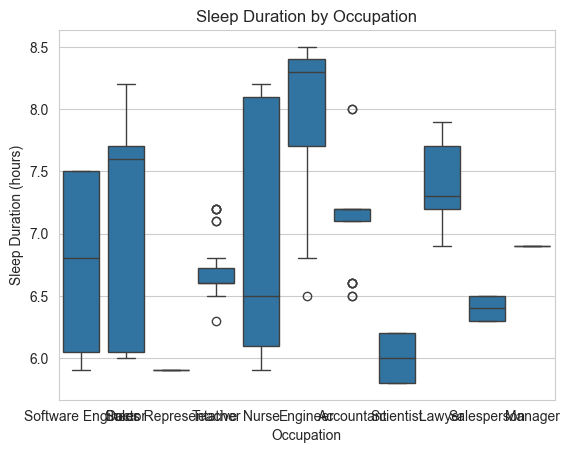

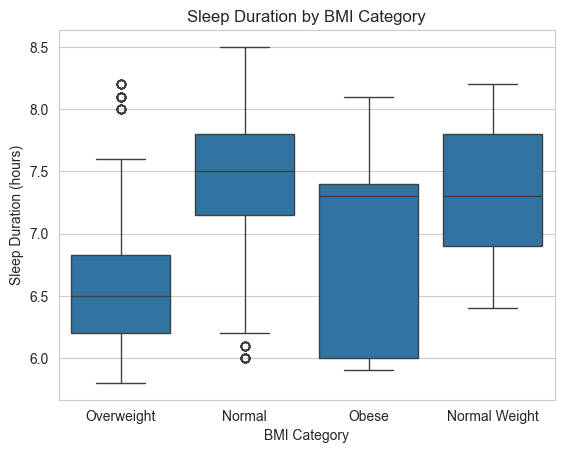

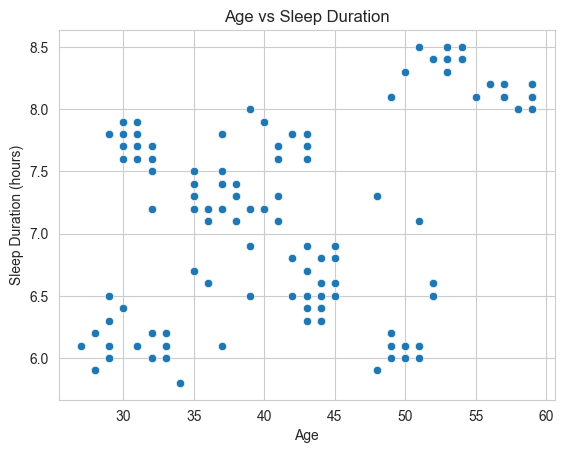

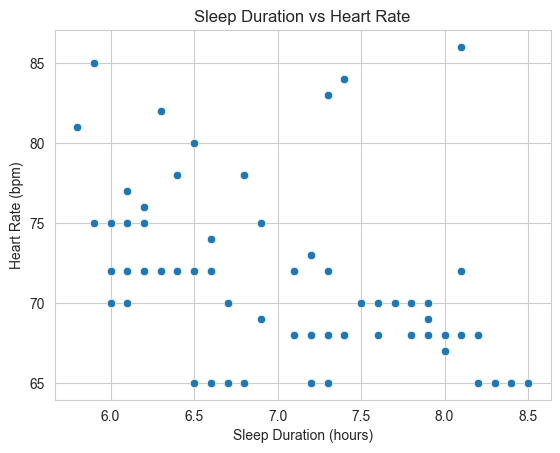

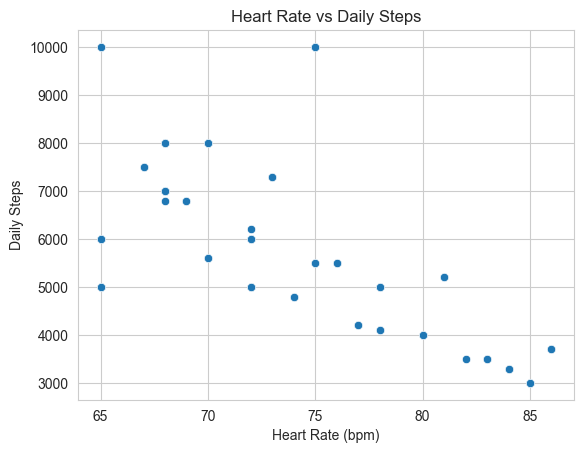

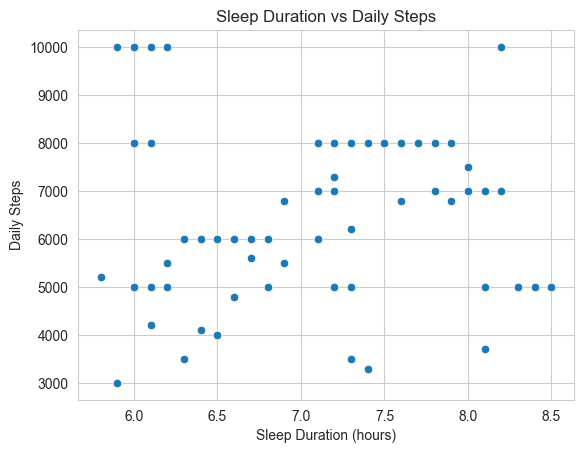

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10600\3926752729.py:56: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


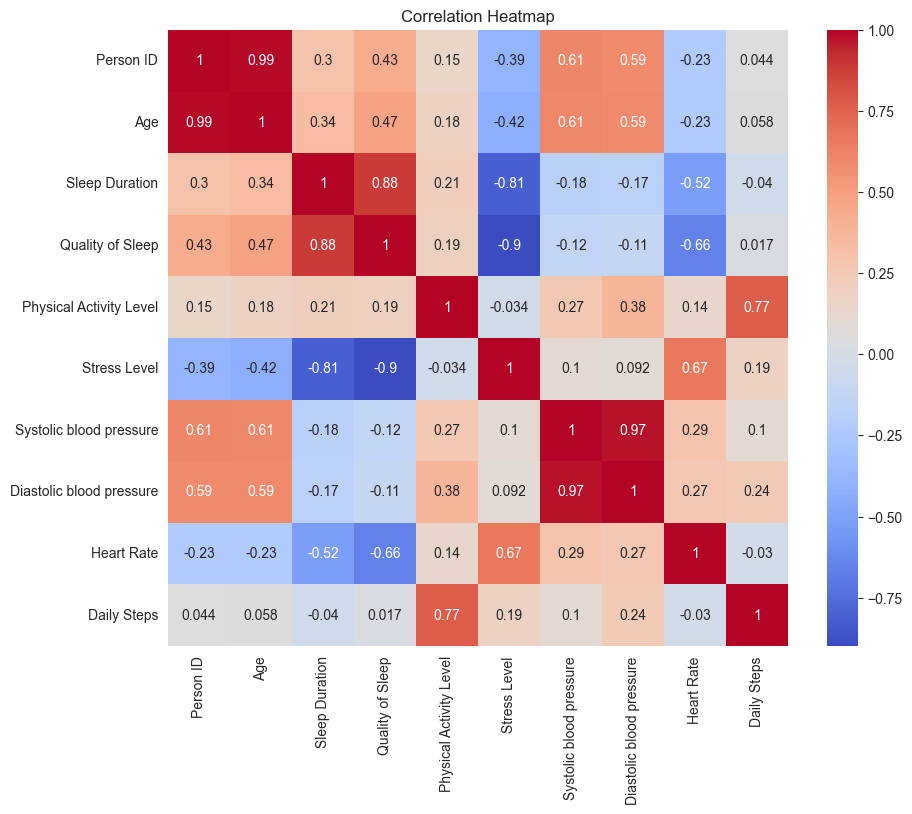

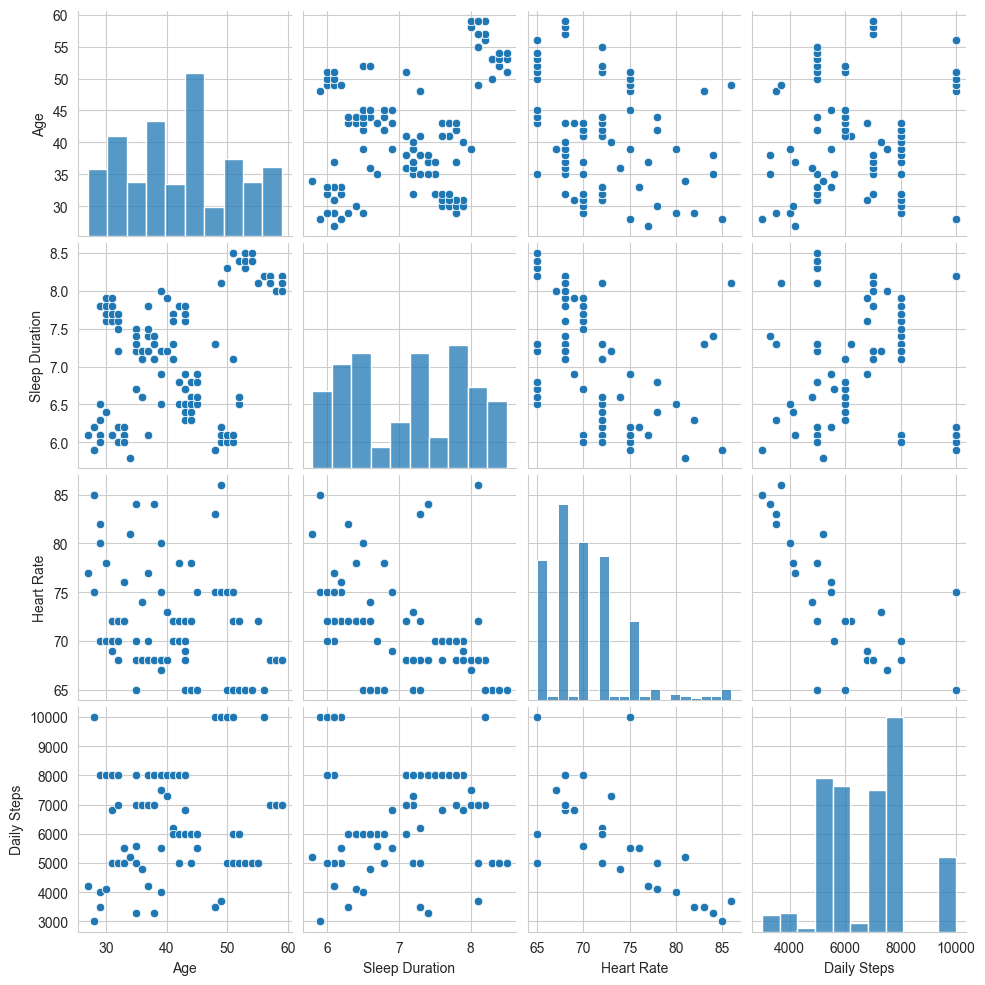

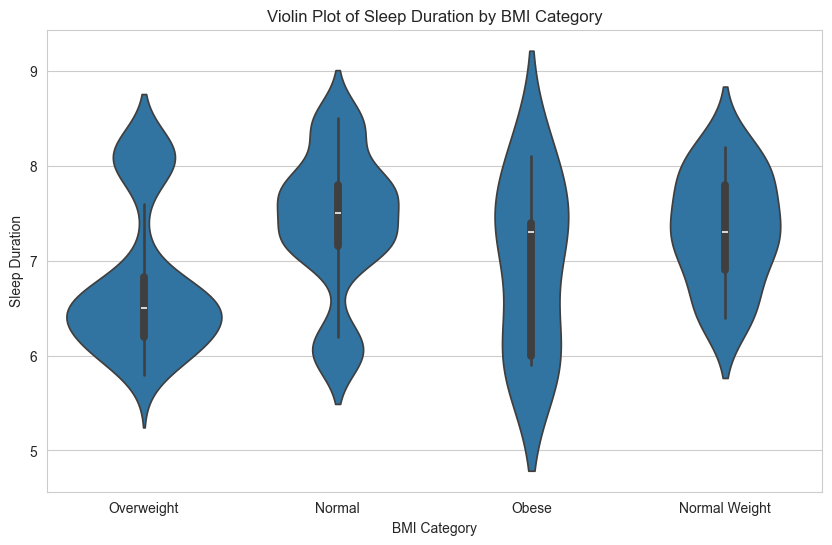

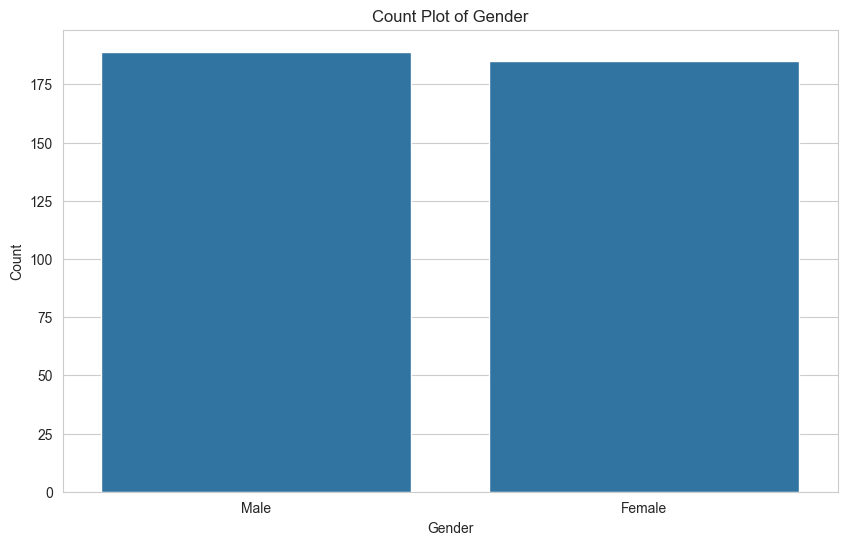

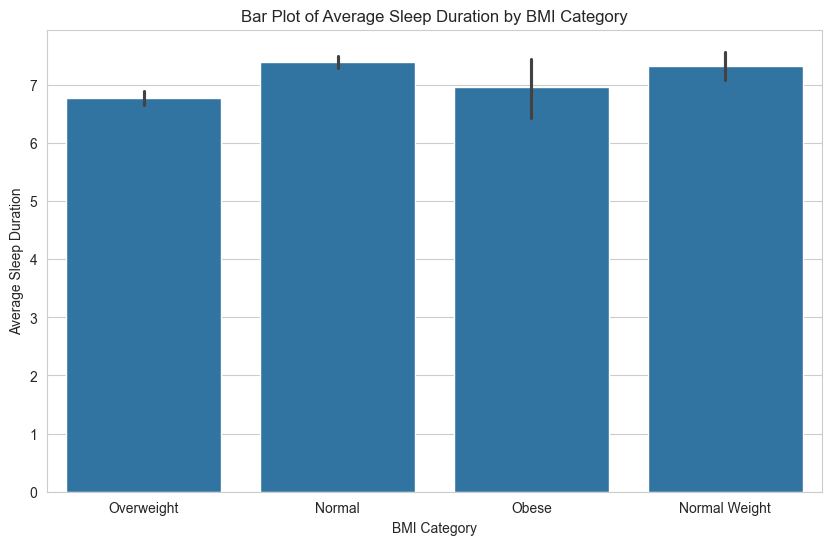

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data using Pandas
data = pd.read_csv('sleep_health.csv')

# Function to plot histograms using pandas
def plot_histogram_pandas(data, column, title, xlabel, ylabel):
    plt.hist(data[column].dropna(), bins=20, alpha=0.7)  # Drop NaN values
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Pandas Histogram Visualizations
plot_histogram_pandas(data, 'Age', 'Age Distribution', 'Age', 'Frequency')
plot_histogram_pandas(data, 'Sleep Duration', 'Sleep Duration Distribution', 'Sleep Duration (hours)', 'Frequency')
plot_histogram_pandas(data, 'Quality of Sleep', 'Quality of Sleep Distribution', 'Quality of Sleep', 'Frequency')
plot_histogram_pandas(data, 'Physical Activity Level', 'Physical Activity Level Distribution', 'Physical Activity Level', 'Frequency')
plot_histogram_pandas(data, 'Stress Level', 'Stress Level Distribution', 'Stress Level', 'Frequency')
plot_histogram_pandas(data, 'Heart Rate', 'Heart Rate Distribution', 'Heart Rate (bpm)', 'Frequency')

# Function to create boxplots using pandas
def plot_boxplot_pandas(data, x, y, title, xlabel, ylabel):
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Pandas Boxplot Visualizations
plot_boxplot_pandas(data, 'Quality of Sleep', 'Sleep Duration', 'Sleep Duration by Quality of Sleep', 'Quality of Sleep', 'Sleep Duration (hours)')
plot_boxplot_pandas(data, 'Stress Level', 'Sleep Duration', 'Sleep Duration by Stress Level', 'Stress Level', 'Sleep Duration (hours)')
plot_boxplot_pandas(data, 'Physical Activity Level', 'Sleep Duration', 'Sleep Duration by Physical Activity Level', 'Physical Activity Level', 'Sleep Duration (hours)')
plot_boxplot_pandas(data, 'Occupation', 'Sleep Duration', 'Sleep Duration by Occupation', 'Occupation', 'Sleep Duration (hours)')
plot_boxplot_pandas(data, 'BMI Category', 'Sleep Duration', 'Sleep Duration by BMI Category', 'BMI Category', 'Sleep Duration (hours)')

# Function to create scatter plots using pandas
def plot_scatter_pandas(data, x, y, title, xlabel, ylabel):
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Pandas Scatter Plot Visualizations
plot_scatter_pandas(data, 'Age', 'Sleep Duration', 'Age vs Sleep Duration', 'Age', 'Sleep Duration (hours)')
plot_scatter_pandas(data, 'Sleep Duration', 'Heart Rate', 'Sleep Duration vs Heart Rate', 'Sleep Duration (hours)', 'Heart Rate (bpm)')
plot_scatter_pandas(data, 'Heart Rate', 'Daily Steps', 'Heart Rate vs Daily Steps', 'Heart Rate (bpm)', 'Daily Steps')
plot_scatter_pandas(data, 'Sleep Duration', 'Daily Steps', 'Sleep Duration vs Daily Steps', 'Sleep Duration (hours)', 'Daily Steps')

# Correlation Heatmap using pandas
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot using pandas
sns.pairplot(data[['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps']])
plt.show()

# Violin Plot using pandas
plt.figure(figsize=(10, 6))
sns.violinplot(x='BMI Category', y='Sleep Duration', data=data)
plt.title('Violin Plot of Sleep Duration by BMI Category')
plt.show()

# Count Plot using pandas
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar Plot using pandas
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI Category', y='Sleep Duration', data=data)
plt.title('Bar Plot of Average Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Sleep Duration')
plt.show()

# Load data using NumPy
data_np = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, dtype=None, encoding=None)

# Ensure data_np is a structured array and extract relevant columns for visualization
if data_np.ndim == 1:
    print("Warning: Data appears to be 1-dimensional. Check the CSV format.")
else:
    # Function to plot histograms using NumPy
    def plot_histogram_numpy(data, column, title, xlabel, ylabel):
        # Extract the column as a regular NumPy array
        column_data = data[:, column]

        # Convert column_data to float, ignoring errors for non-numeric values
        try:
            column_data = np.array([float(value) for value in column_data if value not in (None, '', 'nan')])
            plt.hist(column_data, bins=20, alpha=0.7)
            plt.title(title)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.show()
        except Exception as e:
            print(f"Error with column {column}: {e}")

    # NumPy Histogram Visualizations
    plot_histogram_numpy(data_np, 2, 'Age Distribution', 'Age', 'Frequency')  # Adjusted column index
    plot_histogram_numpy(data_np, 4, 'Sleep Duration Distribution', 'Sleep Duration (hours)', 'Frequency')
    plot_histogram_numpy(data_np, 5, 'Quality of Sleep Distribution', 'Quality of Sleep', 'Frequency')
    plot_histogram_numpy(data_np, 7, 'Physical Activity Level Distribution', 'Physical Activity Level', 'Frequency')
    plot_histogram_numpy(data_np, 8, 'Stress Level Distribution', 'Stress Level', 'Frequency')
    plot_histogram_numpy(data_np, 11, 'Heart Rate Distribution', 'Heart Rate (bpm)', 'Frequency')

    # Function to create scatter plots using NumPy
    def plot_scatter_numpy(x, y, title, xlabel, ylabel):
        plt.scatter(x, y)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    # NumPy Scatter Plot Visualizations
    plot_scatter_numpy(data_np[:, 2].astype(np.float64), data_np[:, 4].astype(np.float64), 'Age vs Sleep Duration', 'Age', 'Sleep Duration (hours)')
    plot_scatter_numpy(data_np[:, 4].astype(np.float64), data_np[:, 11].astype(np.float64), 'Sleep Duration vs Heart Rate', 'Sleep Duration (hours)', 'Heart Rate (bpm)')

    # Additional visualizations using NumPy
    plt.figure(figsize=(10, 6))
    plt.hexbin(data_np[:, 2].astype(np.float64), data_np[:, 4].astype(np.float64), gridsize=30, cmap='Blues', bins='log')
    plt.colorbar(label='log10(N)')
    plt.title('2D Histogram of Age vs Sleep Duration')
    plt.xlabel('Age')
    plt.ylabel('Sleep Duration (hours)')
    plt.show()

    # Cumulative Histogram of Sleep Duration
    plt.hist(data_np[:, 4].astype(np.float64), bins=20, cumulative=True, alpha=0.7)
    plt.title('Cumulative Histogram of Sleep Duration')
    plt.xlabel('Sleep Duration (hours)')
    plt.ylabel('Cumulative Frequency')
    plt.show()
